<a href="https://colab.research.google.com/github/mrtkp9993/FinanceExamplesPy/blob/main/02_cointegration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, coint

<IPython.core.display.Javascript object>

In [4]:
stocks = [
    "KCHOL.IS",
    "AYGAZ.IS",
    "FROTO.IS",
    "MAALT.IS",
    "OTKAR.IS",
    "TATGD.IS",
    "TOASO.IS",
    "ARCLK.IS",
    "TTRAK.IS",
    "TUPRS.IS",
    "YKBNK.IS",
    "YKGYO.IS",
]

<IPython.core.display.Javascript object>

In [5]:
df = yf.download(stocks, start="2013-01-01")
df = df["Adj Close"]
df.fillna(method="pad", inplace=True)

[*********************100%***********************]  12 of 12 completed


<IPython.core.display.Javascript object>

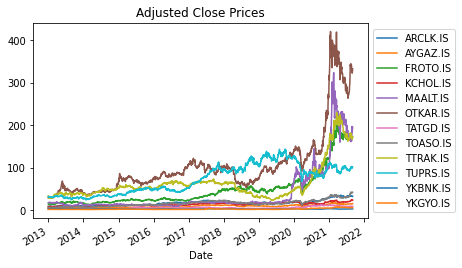

<IPython.core.display.Javascript object>

In [6]:
f = plt.figure()
plt.title("Adjusted Close Prices", color="black")
df.plot(ax=f.gca())
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.show()

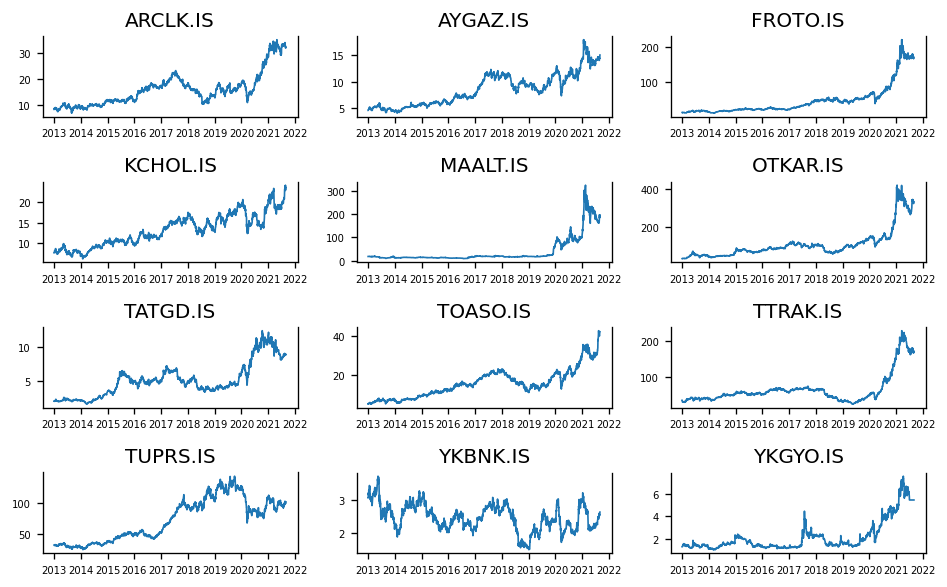

<IPython.core.display.Javascript object>

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=3, dpi=120, figsize=(8, 5))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, linewidth=1)
    ax.set_title(df.columns[i])
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout()

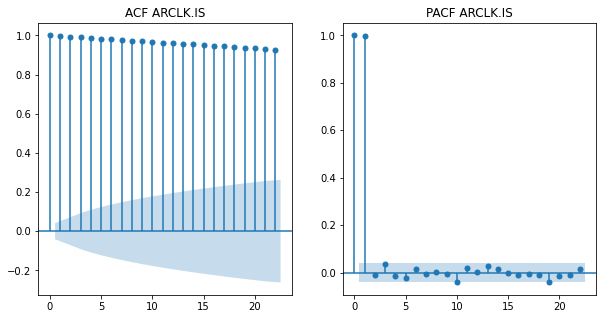

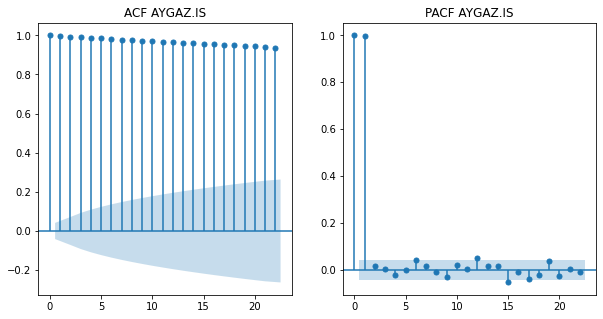

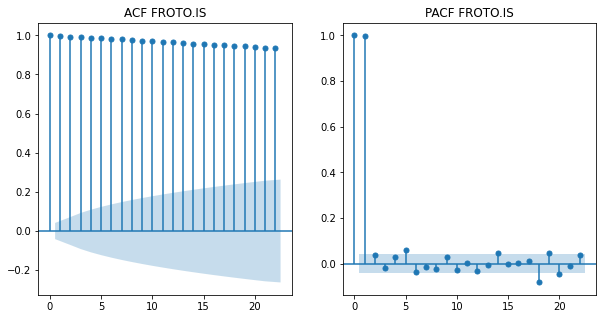

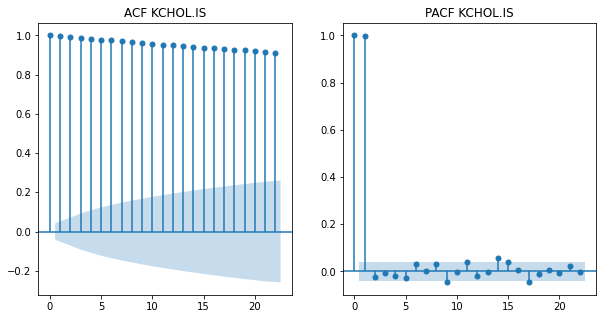

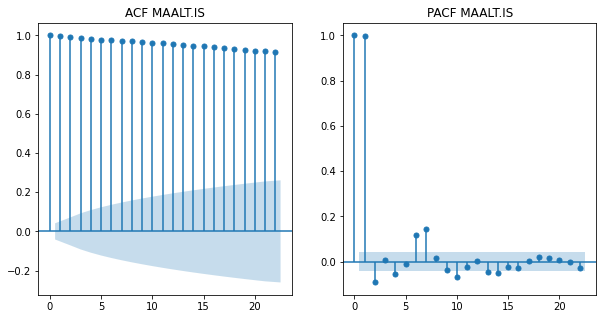

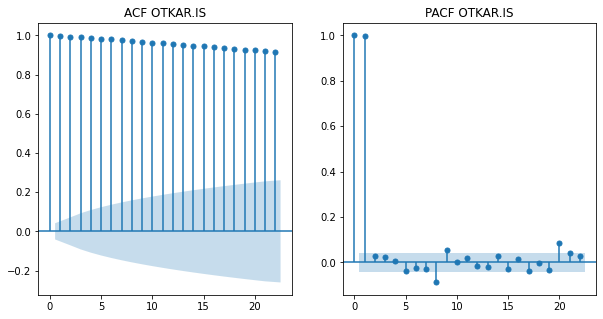

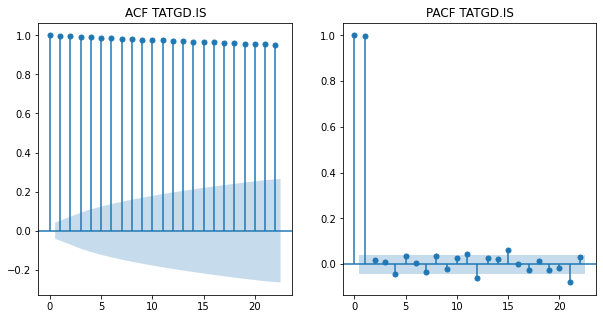

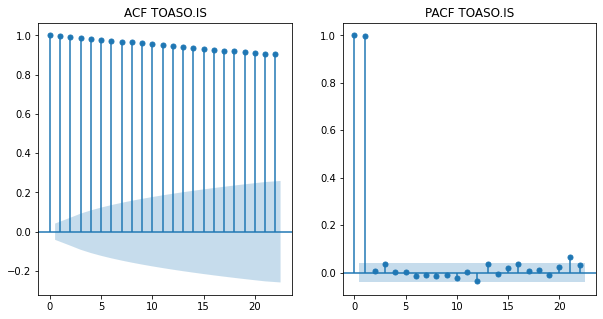

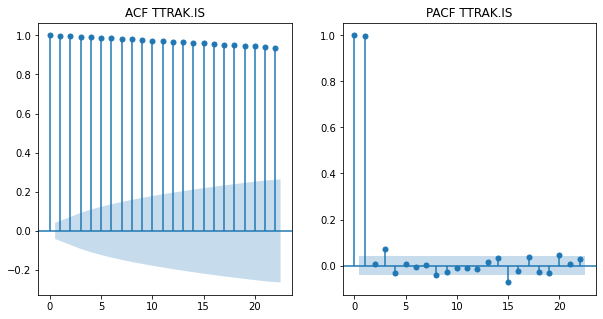

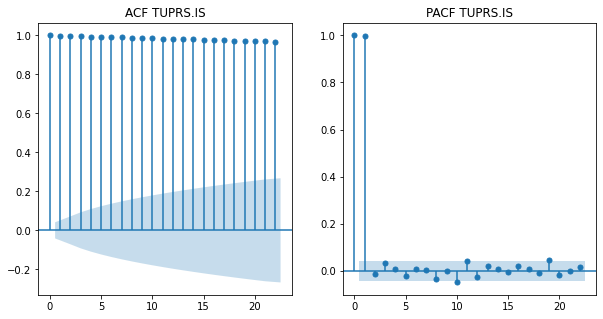

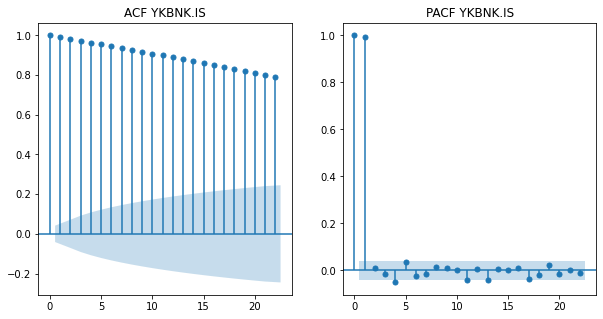

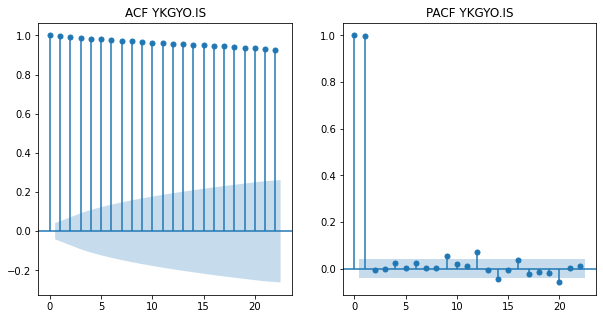

<IPython.core.display.Javascript object>

In [8]:
for i in df.columns:
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    plot_acf(df[i].values.squeeze(), lags=22, ax=ax[0], title=f"ACF {i}")
    plot_pacf(df[i].values.squeeze(), lags=22, ax=ax[1], title=f"PACF {i}")
    plt.show()

In [9]:
for i in df:
    res = adfuller(df[i])
    print(f"ADF Statistic for {i}: {res[0]}")
    print(f"p-value: {res[1]}")

ADF Statistic for ARCLK.IS: -0.12366163289712094
p-value: 0.9470301467855159
ADF Statistic for AYGAZ.IS: -0.7156156296532312
p-value: 0.8426631695555284
ADF Statistic for FROTO.IS: 1.7925170716302292
p-value: 0.9983340598170966
ADF Statistic for KCHOL.IS: -0.800665845681842
p-value: 0.8189264022547554
ADF Statistic for MAALT.IS: -0.4804345690584145
p-value: 0.8957783398358674
ADF Statistic for OTKAR.IS: -0.1494389602907965
p-value: 0.9442861062523298
ADF Statistic for TATGD.IS: -1.0813788238452036
p-value: 0.7224404039462373
ADF Statistic for TOASO.IS: 1.0798680567709007
p-value: 0.9950410888239852
ADF Statistic for TTRAK.IS: 0.0032744313023046565
p-value: 0.9588020429743135
ADF Statistic for TUPRS.IS: -1.2067470894070502
p-value: 0.6706865706378365
ADF Statistic for YKBNK.IS: -3.253961425165419
p-value: 0.017066080826655044
ADF Statistic for YKGYO.IS: -0.3892968819971295
p-value: 0.9118705354374821


<IPython.core.display.Javascript object>

In [10]:
for s1 in df.columns:
    for s2 in df.columns:
        if s1 != s2:
            res = coint(df[s1], df[s2], trend="nc")
            pval = res[1]
            if pval <= 0.05:
                print(f"{s1} and {s2} has cointegration, p-value: {pval}")

ARCLK.IS and TOASO.IS has cointegration, p-value: 0.04903369798110527
AYGAZ.IS and KCHOL.IS has cointegration, p-value: 0.007029900251131765
FROTO.IS and MAALT.IS has cointegration, p-value: 0.015757028038897322
FROTO.IS and OTKAR.IS has cointegration, p-value: 0.004399007493986555
KCHOL.IS and AYGAZ.IS has cointegration, p-value: 0.007101145930953294
MAALT.IS and FROTO.IS has cointegration, p-value: 0.00783799297255268
OTKAR.IS and FROTO.IS has cointegration, p-value: 0.003094678911810982
OTKAR.IS and TTRAK.IS has cointegration, p-value: 0.04185601871282213
OTKAR.IS and YKGYO.IS has cointegration, p-value: 0.00282083357242191
TTRAK.IS and OTKAR.IS has cointegration, p-value: 0.03639137062922606
TTRAK.IS and YKGYO.IS has cointegration, p-value: 0.03834839887528665
YKGYO.IS and OTKAR.IS has cointegration, p-value: 0.0017665073676291331
YKGYO.IS and TOASO.IS has cointegration, p-value: 0.046004150077470406
YKGYO.IS and TTRAK.IS has cointegration, p-value: 0.027200620035757236


<IPython.core.display.Javascript object>